<a href="https://colab.research.google.com/github/skyballengine/fc_deep_learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # 02. Neural Network classification with PyTorch
  Classification is a problem of predicting whether soemthing is one thing or another
  (Multiple things as an option)

In [241]:
## 1. Make classification data and get it ready
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)



In [242]:
len(X), len(y)

(1000, 1000)

In [243]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [244]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [245]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [246]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                          "X2": X[:, 1],
                          "label": y})

In [247]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [248]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


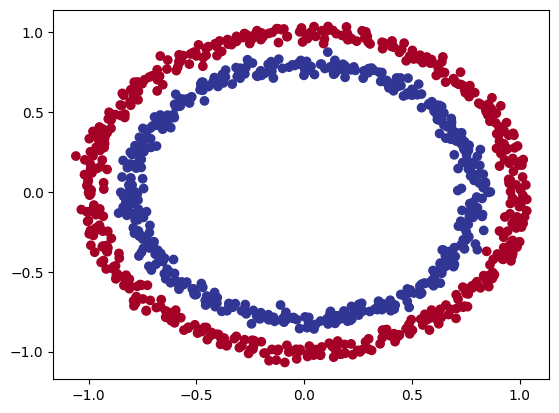

In [249]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[: , 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is smallenough to experiment but still large enough to practice the fundamentals.

# 1.1 Check input and output shapes



In [250]:
X.shape, y.shape

((1000, 2), (1000,))

In [251]:
# View the first examples of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape}")
print(f"Shapes for one sample of y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074]
Values for one sample of y: 1
Shapes for one sample of X: (2,)
Shapes for one sample of y: ()


### 1.2 Turn data into tensors and creating train and test splits


In [252]:
import torch
torch.__version__

'2.0.1+cu118'

In [253]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [254]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [255]:
# # Splitting data into training and test segments
# train_test_split = int(0.8 * len(X))
# X_train, y_train = X[:train_test_split], y[:train_test_split]
# X_test, y_test = X[train_test_split:], y[train_test_split:]
# len(X_train), len(y_train), len(X_test), len(y_test)

In [256]:
# Split data into training and test sets randomly
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [258]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:
1. Setup device agnostic code so ourt code will run on an accelerator (GPU) if there is one, else a CPU)
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [259]:
# Import PyTorch and nn
import torch
from torch import nn

# Make code device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [260]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

# Let's create a model

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable opf handl;ing the shapes of our data
3. Defines a forward() method that overwrites nn.Module and outlines the forward pass (forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [261]:
device

'cuda'

In [262]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.Linear layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward()_ method that outlines the forward pass
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV1().to(device)
model_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [263]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [264]:
# Let's replicate model above using nn.Sequential()
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_1


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [265]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265,  0.3591,
                      -0.4310, -0.7000], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,  0.2475,
                       -0.2247,  0.0199],
                      [-0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874, -0.1886,
                       -0.1886,  0.2844],
                      [ 0.1054,  0.3043, -0.2610, -0.313

In [266]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [267]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup loss function and optimizer
Which loss function or optimizer should we use for a classification problem?

This is problem specific.

For example, for regression you mightt want to use MAE or MSE

For classification you would want to use binary cross entropy or categorical cross entropy (cross entropy)

Remember that the loss function measures how **wrong** your model's predictions are.

And for optimizers, two of th most common and useful are SGD and Adam, however PyTorch has many built in options.

* For the loss function we're goin to use the `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [268]:
# Setup loss function
# loss_fn = nn.BCELoss() - requires that inputs have already gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss()  # sigmoid activation function built in
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [269]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386],
                      [-0.6007,  0.5459],
                      [ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265,  0.3591,
                      -0.4310, -0.7000], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,  0.2475,
                       -0.2247,  0.0199],
                      [-0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874, -0.1886,
                       -0.1886,  0.2844],
                      [ 0.1054,  0.3043, -0.2610, -0.313

In [270]:
# Calculate the accuracy - out of 100 examples, what percentage does our model get it right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train our model

We need a training loop!

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. loss backward (back propagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are called raw **logits**

We can convert these logits into prediciton probabilities by passing them into some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the **argmax()**

In [271]:
# View the first 5 outputs of the forward pass on the test data
model_1.eval()
with torch.inference_mode():
  y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[ 0.3534],
        [ 0.3016],
        [ 0.2476],
        [ 0.3844],
        [-0.1359]], device='cuda:0')

In [272]:
y_logits[:5], y_test[:5]

(tensor([[ 0.3534],
         [ 0.3016],
         [ 0.2476],
         [ 0.3844],
         [-0.1359]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [273]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5874],
        [0.5748],
        [0.5616],
        [0.5949],
        [0.4661]], device='cuda:0')

For our prediction probabuility values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [274]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
print(y_preds)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))
print(y_pred_labels)

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
print(y_preds.shape)
y_preds.squeeze()
y_preds.shape

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)
tensor([True, True, True, True, True], device='cuda:0')
torch.Size([5, 1])


torch.Size([5, 1])

In [275]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [276]:
y_preds, y_test[:5]

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

### 3.2 Building a training and testing loop


In [277]:
device

'cuda'

In [278]:
!nvidia-smi

Fri Sep 22 18:54:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    30W /  70W |    821MiB / 15360MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [279]:
from torch.nn.modules.loss import BCEWithLogitsLoss
# Training
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# There is also a cuda random seed at torch.cuda.manual_seed()
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building a training and evaluation loop]
for epoch in range(epochs):
  # Training
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()

  # Convert to prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # Calculate loss / accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss() accepts raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward (back propagation)
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # get prediction probabilities

    # Calaculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happenin
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.70021, Acc: 51.50 | Test loss: 0.70111, Test acc: 53.00
Epoch: 10 | Loss: 0.69650, Acc: 50.50 | Test loss: 0.69766, Test acc: 54.00
Epoch: 20 | Loss: 0.69501, Acc: 49.25 | Test loss: 0.69626, Test acc: 52.50
Epoch: 30 | Loss: 0.69427, Acc: 49.38 | Test loss: 0.69556, Test acc: 51.50
Epoch: 40 | Loss: 0.69384, Acc: 49.50 | Test loss: 0.69514, Test acc: 51.00
Epoch: 50 | Loss: 0.69356, Acc: 49.25 | Test loss: 0.69488, Test acc: 51.50
Epoch: 60 | Loss: 0.69338, Acc: 49.25 | Test loss: 0.69471, Test acc: 51.00
Epoch: 70 | Loss: 0.69326, Acc: 49.88 | Test loss: 0.69459, Test acc: 50.50
Epoch: 80 | Loss: 0.69317, Acc: 50.25 | Test loss: 0.69451, Test acc: 48.00
Epoch: 90 | Loss: 0.69312, Acc: 50.00 | Test loss: 0.69446, Test acc: 49.00
Epoch: 100 | Loss: 0.69308, Acc: 50.25 | Test loss: 0.69443, Test acc: 48.50
Epoch: 110 | Loss: 0.69305, Acc: 50.25 | Test loss: 0.69440, Test acc: 47.00
Epoch: 120 | Loss: 0.69303, Acc: 50.62 | Test loss: 0.69439, Test acc: 47.00
Epoch: 130

In [280]:
loss_fn

BCEWithLogitsLoss()

In [281]:
loss_fn_without_logits = nn.BCELoss() # expects prediction probablities as input

In [282]:
loss_fn_without_logits

BCELoss()

## Let's get viaual to understand why our accuracty is around 50%
## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything!

Remember to visualize, visulaize, and visualize.

We're going to import a function that

In [283]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download.....")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  print(request)

with open("helper_functions.py", "wb") as f:
  f.write(request.content)
  # UTIL_PATH = Path("utilities")
  # UTIL_PATH.mkdir(parents=True, exist_ok=True)
  # src_file = Path("helper_functions.py")
  # dest_file = UTIL_PATH / src_file
  # src_file.rename(dest_file)

helper_functions.py already exists, skipping download.....


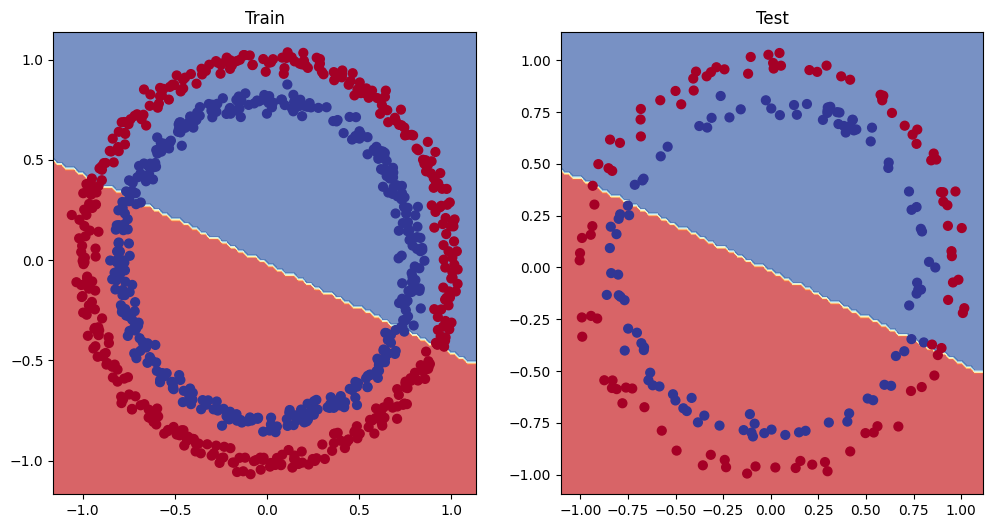

In [284]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # params are (rows, columns, index)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5. Improving a odel (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden
* Fit for longer - train
* Changing the activation function
* Change the learning rate
* Change the loss function


In [285]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0867, -0.2861],
                      [ 0.4684, -0.5564],
                      [-0.3351, -0.2001],
                      [-0.4203,  0.0643],
                      [-0.6946,  0.6364],
                      [-0.5861,  0.5421],
                      [ 0.0983, -0.2263],
                      [ 0.4266,  0.1126],
                      [ 0.5723,  0.0787],
                      [-0.2227,  0.1892]])),
             ('0.bias',
              tensor([-0.1908,  0.2989,  0.6304,  0.4069, -0.3108,  0.4057,  0.1279,  0.3602,
                      -0.4297, -0.7005])),
             ('1.weight',
              tensor([[-0.1216, -0.2400,  0.2576,  0.0886,  0.1274,  0.0959, -0.0048,  0.2485,
                       -0.2219,  0.0197],
                      [-0.2153,  0.0987, -0.1098,  0.0957, -0.0676,  0.2601, -0.1870, -0.1885,
                       -0.1874,  0.2846],
                      [ 0.1050,  0.2871, -0.2497, -0.2985, -0.2227, -0.1888,  0.1236,  0.1